In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from numpy.random import randint
import os
import imageio
import pandas as pd

C:\Users\KASHI\Anaconda3\envs\python-cvcourse\lib\site-packages\matplotlib\pyplot.py:522: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


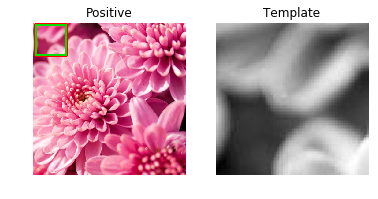

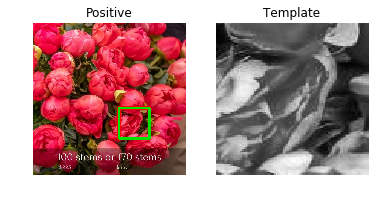

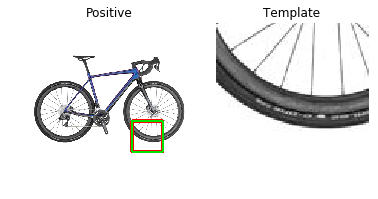

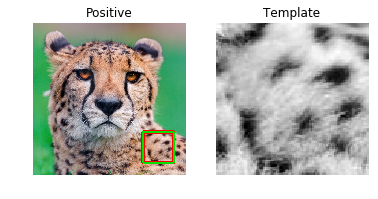

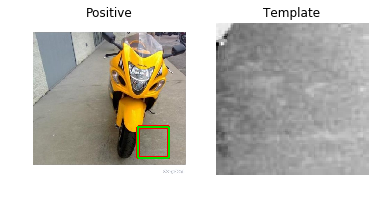

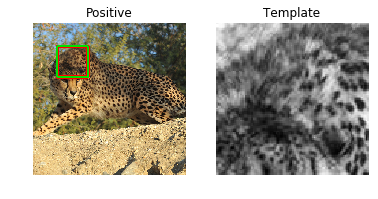

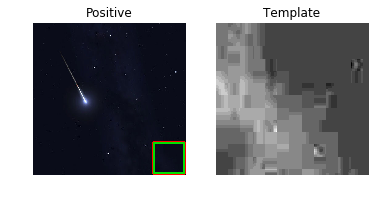

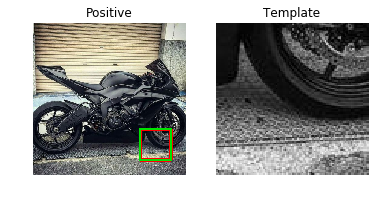

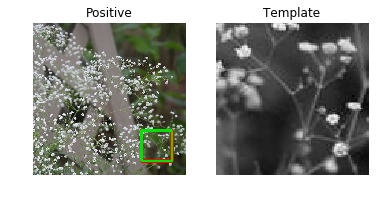

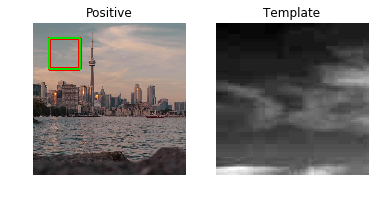

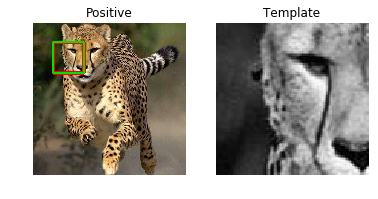

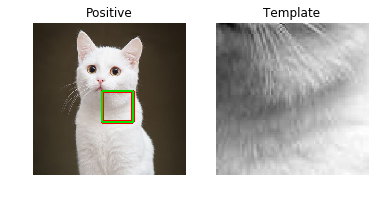

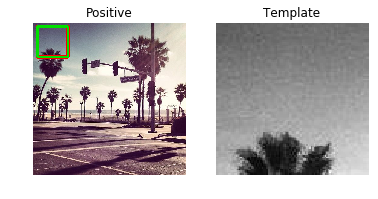

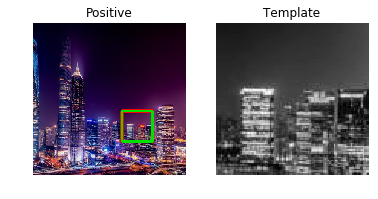

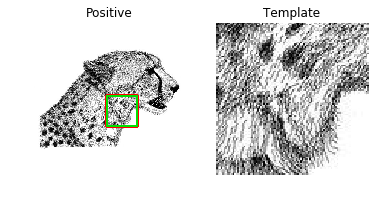

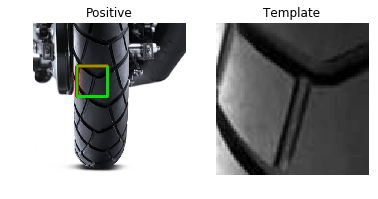

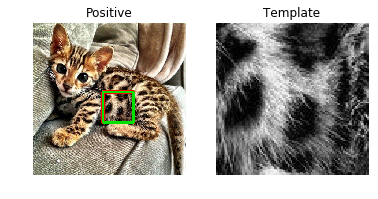

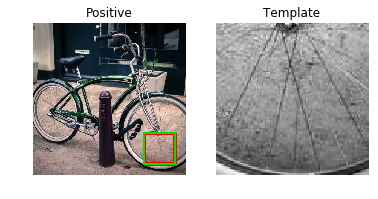

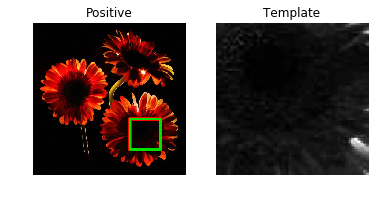

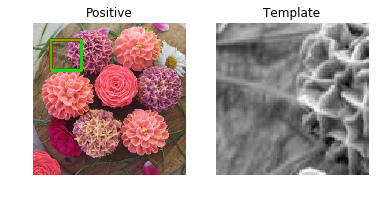

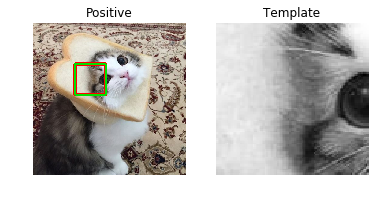

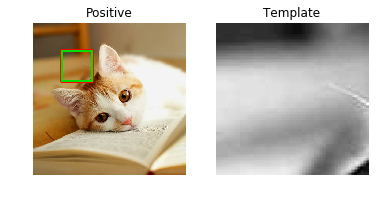

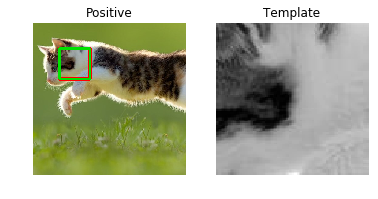

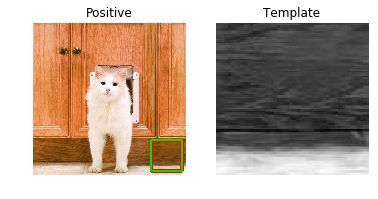

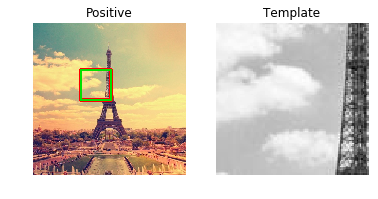

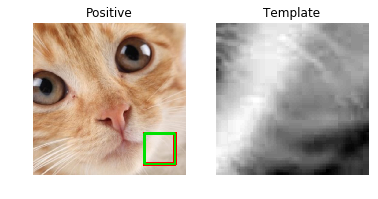

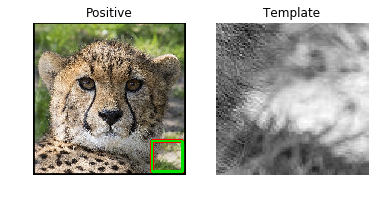

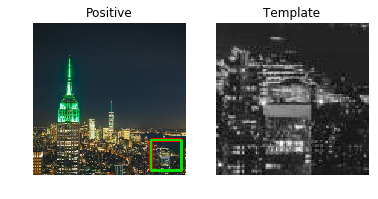

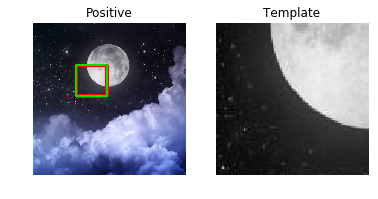

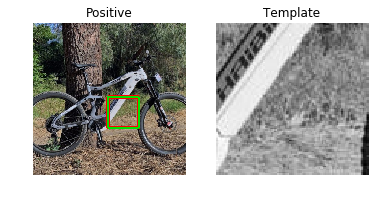

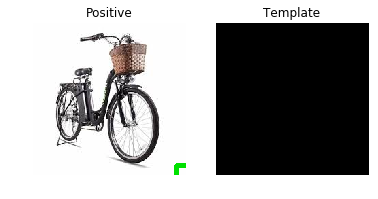

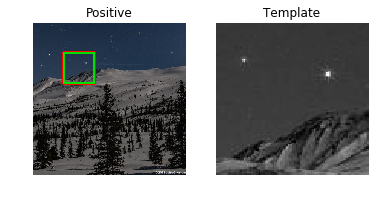

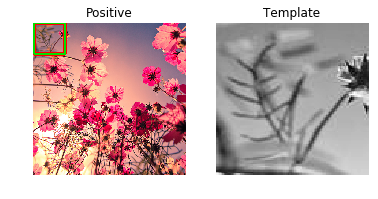

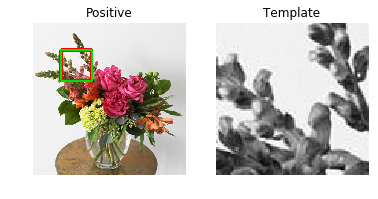

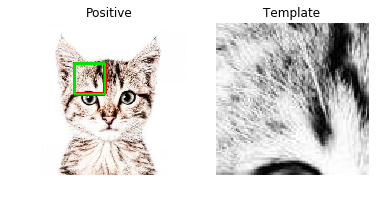

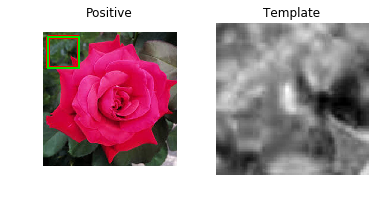

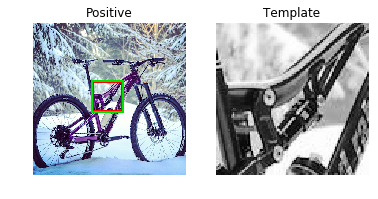

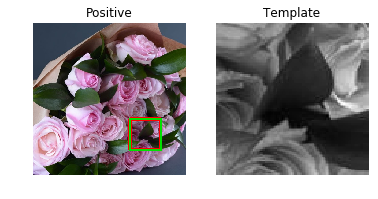

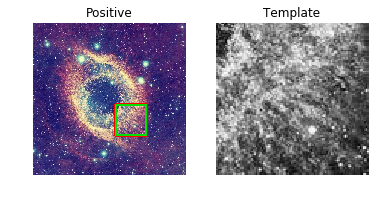

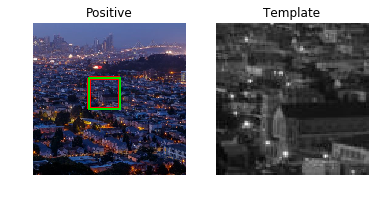

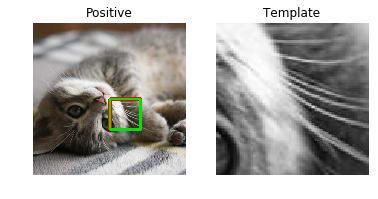

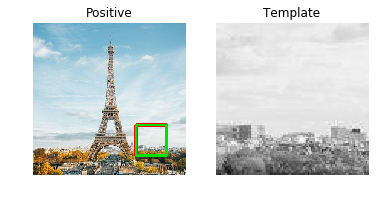

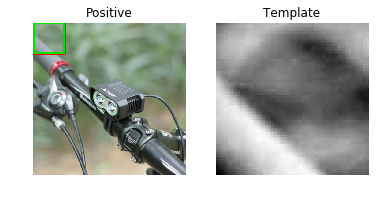

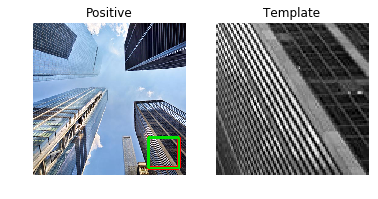

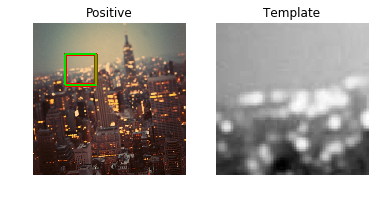

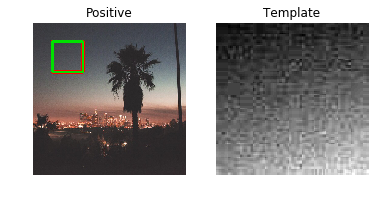

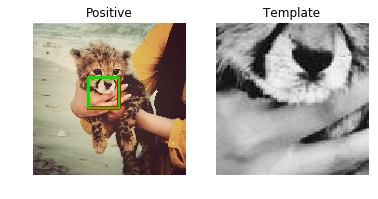

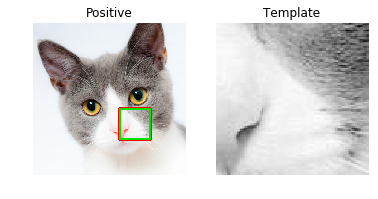

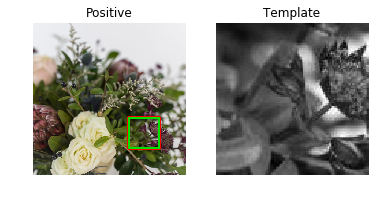

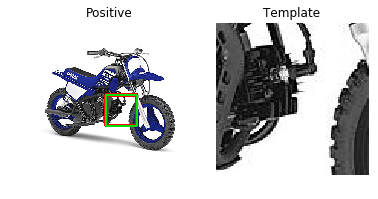

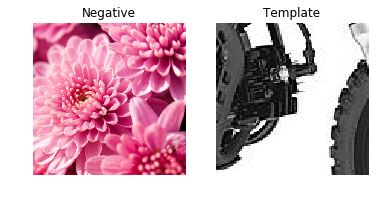

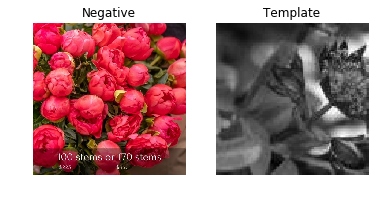

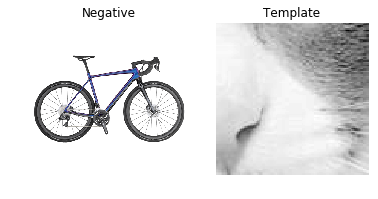

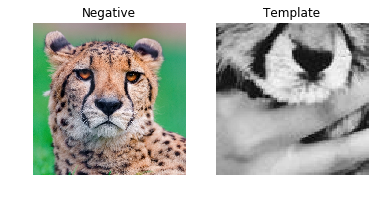

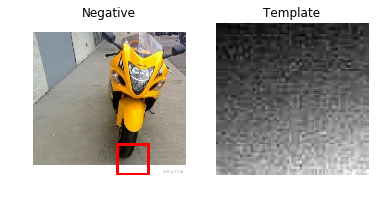

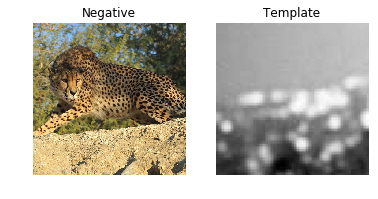

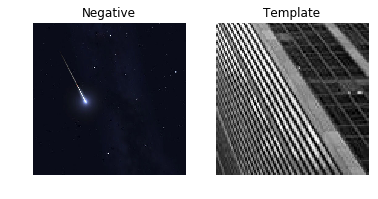

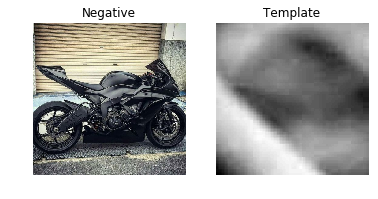

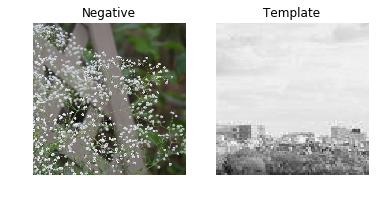

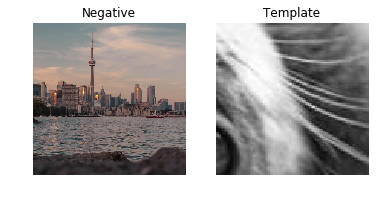

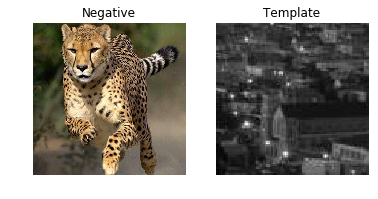

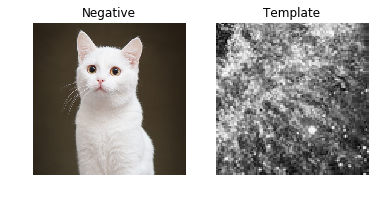

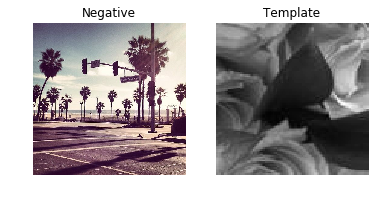

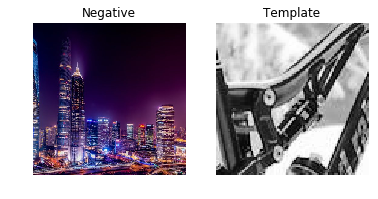

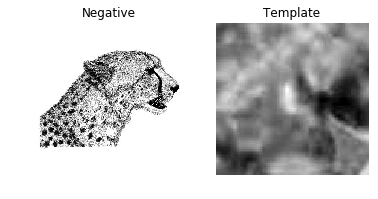

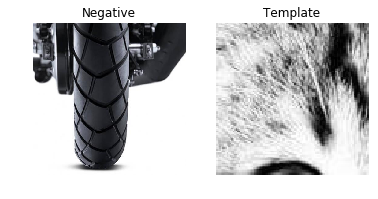

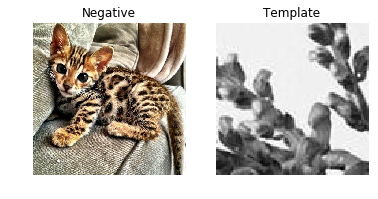

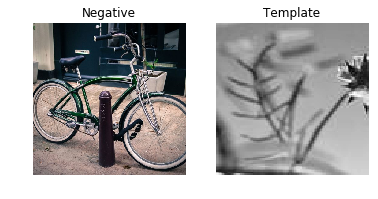

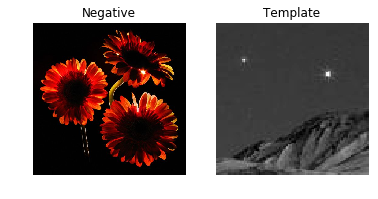

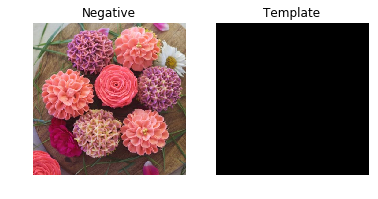

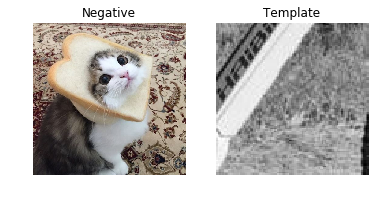

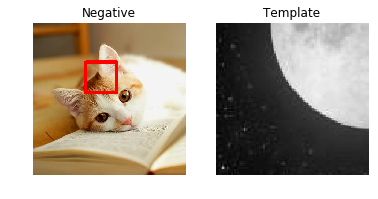

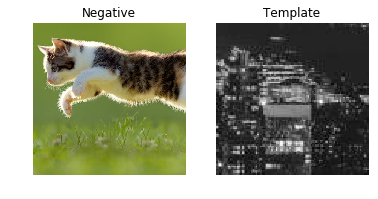

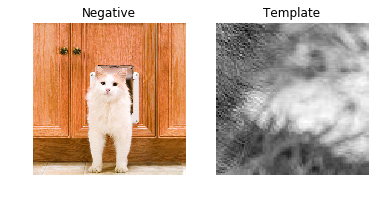

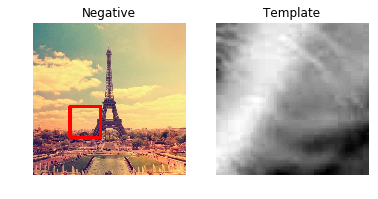

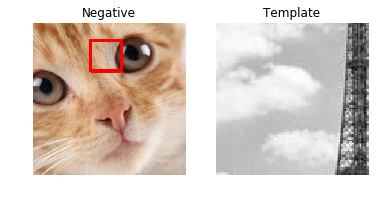

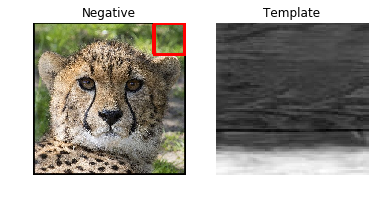

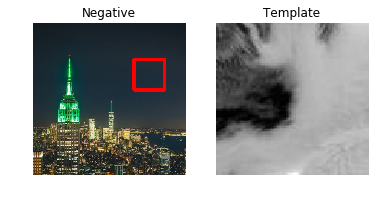

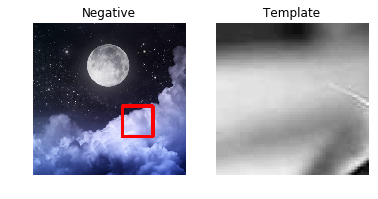

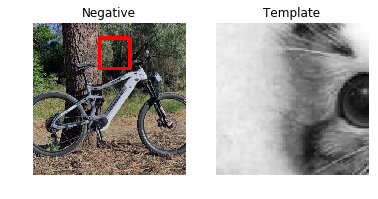

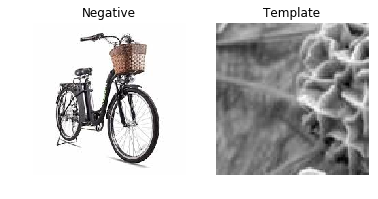

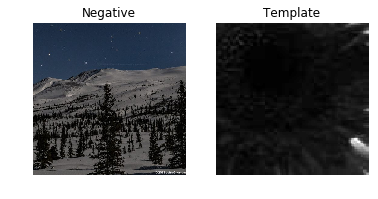

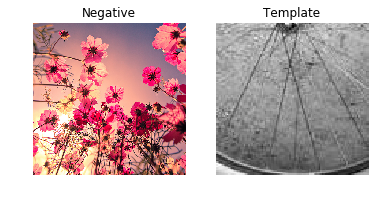

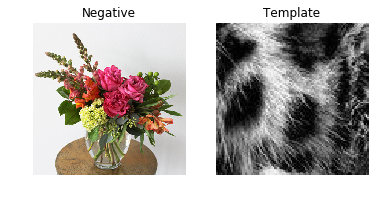

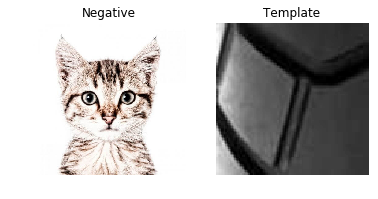

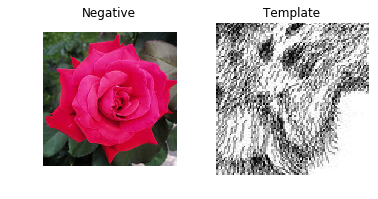

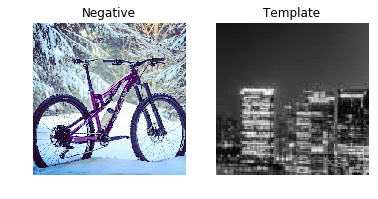

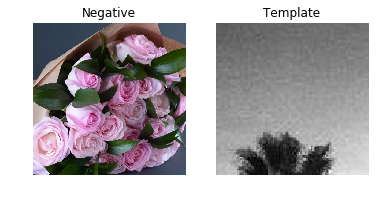

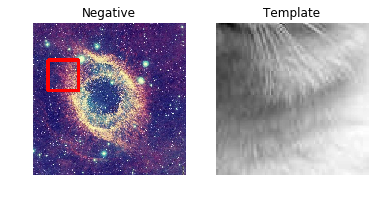

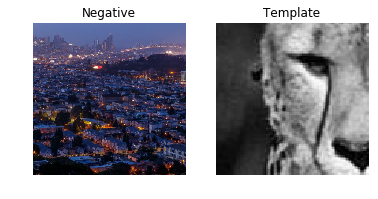

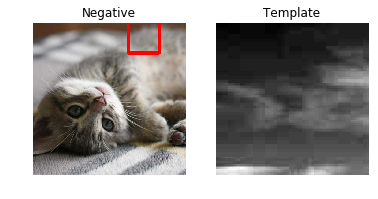

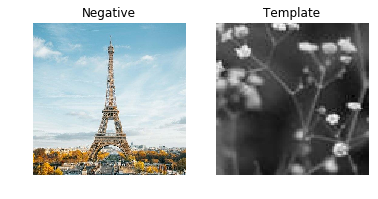

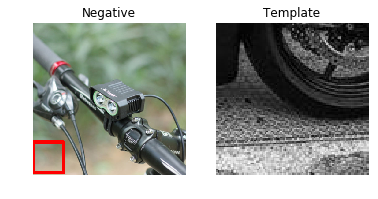

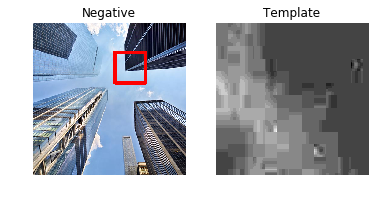

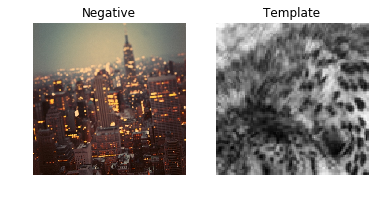

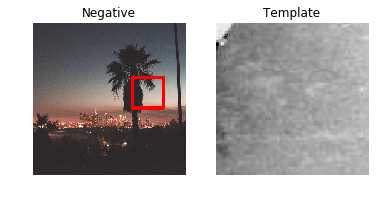

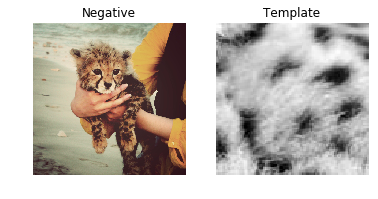

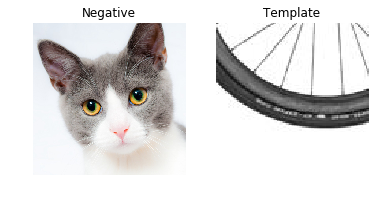

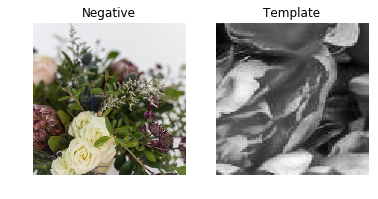

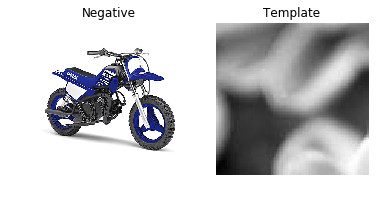

In [2]:
df = pd.read_csv("./dataSet.csv")
threshold = 0.6
cm = {
    "TN":0,
    "FP":0,
    "FN":0,
    "TP":0
}

for arr in df.to_numpy():

    img_org = cv2.imread(arr[0])
    img_main = cv2.cvtColor(img_org, cv2.COLOR_BGR2GRAY)
    img_template = cv2.cvtColor(cv2.imread(arr[1]), cv2.COLOR_BGR2GRAY)

    width, height = img_template.shape[::-1]
    
    match = cv2.matchTemplate(img_main, img_template, cv2.TM_CCOEFF_NORMED)
    loc = np.where( match >= threshold)

    (_, _, _, loc_max) = cv2.minMaxLoc(match)


    (x_start, y_start) = (int(loc_max[0]), int(loc_max[1]))
    (x_end, y_end) = (int((loc_max[0] + width)), int((loc_max[1] + height)))
    

    if len(loc[0]) != 0:
        cv2.rectangle(img_org, (x_start, y_start), (x_end, y_end), (0, 0, 255), 10)
    if arr[6] == "Positive":
        cv2.rectangle(img_org, (arr[2], arr[3]), (arr[4], arr[5]), (0, 225, 0), 5)

    if (arr[6] == "Positive"):
        if x_start == arr[2] and y_start == arr[3]:
            cm["TP"] = cm["TP"] + 1
        else:
            cm["FN"] = cm["FN"] + 1
    else:
        if len(loc[0]) == 0:
            cm["TN"] = cm["TN"] + 1
        else:
            cm["FP"] = cm["FP"] + 1
    
    f, axarr = plt.subplots(1,2)
    axarr[0].axis("off")
    axarr[0].set_title(arr[6])
    axarr[0].imshow(cv2.cvtColor(img_org, cv2.COLOR_BGR2RGB))
    axarr[1].axis("off")
    axarr[1].set_title("Template")
    axarr[1].imshow(img_template,cmap="gray")

In [3]:
print(cm)

{'TN': 37, 'FP': 13, 'FN': 1, 'TP': 49}
